In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [239]:
data = pd.read_csv("df_par_id.csv")

In [240]:
data.columns

Index(['Unnamed: 0', 'customer_unique_id', 'freight_value_x', 'review_score',
       'score_freq', 'price_y', 'score_rec', 'score_montant', 'score_rfm',
       'customer_city', 'order_id', 'product_id', 'seller_id',
       'categorie_regroupee'],
      dtype='object')

In [241]:
data = data[['freight_value_x', 'review_score',
       'score_freq', 'price_y', 'score_rec', 'score_montant', 
       'customer_city', 
       'categorie_regroupee']]

In [242]:
# Separate categorical and numerical features
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include='number').columns.tolist()

cat_data = data[cat_cols]
num_data = data[num_cols]


In [243]:
num_data = np.log1p(num_data)

In [244]:
# Define the number of clusters
n_clusters = 4

In [245]:
# Preprocessing numerical data with standard scaling
scaler = StandardScaler()
scaled_num_data = scaler.fit_transform(num_data)

In [246]:
cat_data

,customer_city,categorie_regroupee
0,cajamar,Mobilier
1,osasco,Beauté et Santé
2,sao jose,Livre et Papeterie
3,belem,Technologie
4,sorocaba,Technologie
...,...,...
94716,sanharo,Beauté et Santé
94717,feira de santana,Alimentation
94718,sinop,Bricolage et Jardin
94719,bom jesus do norte,Mode


In [247]:
# Preprocessing categorical data with one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_cat_data = encoder.fit_transform(cat_data)

/home/apprenant/miniconda3/envs/data_anayse_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [248]:
# Concatenate the preprocessed numerical and categorical data
X = np.hstack((num_data, encoded_cat_data))


In [249]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)


# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.predict(X)

# Add the cluster labels to the data frame as a new column
data["cluster"] = labels


/home/apprenant/miniconda3/envs/data_anayse_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [250]:
# Reduce dimensionality of preprocessed data with PCA
pca = PCA(n_components=0.95,random_state=42)
X_pca = pca.fit_transform(X)


In [251]:
# Add the PCA components to the data frame as new columns
data['pca_1'] = X_pca[:, 0]
data['pca_2'] = X_pca[:, 1]

In [252]:
def get_mode(x):
    return x.mode().iloc[0]


In [253]:



# Group the data by cluster to see the statistics for each cluster
grouped = data.groupby("cluster").agg({'score_rec': 'mean', 
                                        'pca_1': 'mean', 
                                        'pca_2': 'mean',
                                        'review_score' : 'mean',
                                        'score_freq' : 'mean',
                                        'score_montant' : 'mean',
                                        'price_y' : 'mean'})

# Print the statistics for each cluster
print(grouped)

         score_rec     pca_1     pca_2  review_score  score_freq  \
cluster                                                            
0         3.041599  1.450420  0.048049      3.980162    1.015112   
1         2.979075 -1.314752  0.005853      4.172193    1.000389   
2         2.924395  0.102187 -0.560532      4.040949    1.003625   
3         3.011269  0.052321  0.237704      4.148882    1.001332   

         score_montant     price_y  
cluster                             
0             4.915340  407.544609  
1             1.156507   29.246493  
2             3.124488  102.688909  
3             3.086158   99.105646  


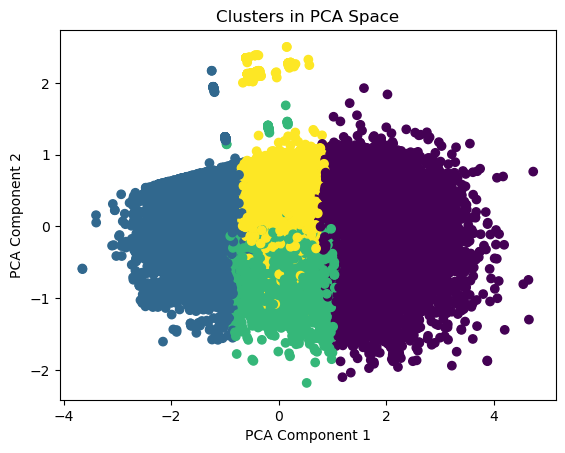

In [254]:
# Plot the clusters in the PCA space
plt.scatter(data['pca_1'], data['pca_2'], c=data['cluster'])
plt.title('Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


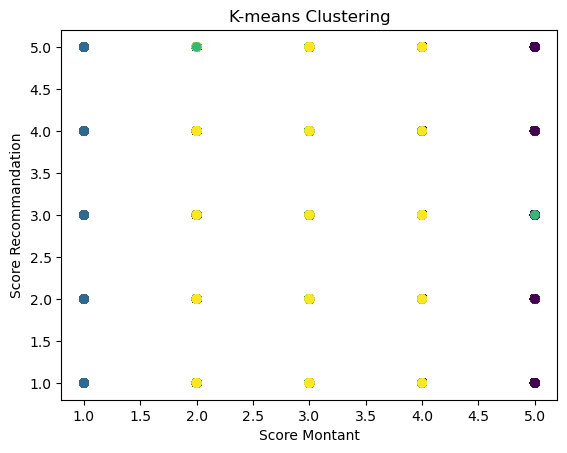

In [255]:

# Plot the clusters
plt.scatter(data["score_montant"], data["score_rec"], c=data["cluster"])
plt.xlabel("Score Montant")
plt.ylabel("Score Recommandation")
plt.title("K-means Clustering")
plt.show()


In [256]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(data[["score_montant", "score_rec"]], labels)
print("Silhouette Score:", silhouette_score) 


Silhouette Score: 0.12802719957694042


/home/apprenant/miniconda3/envs/data_anayse_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


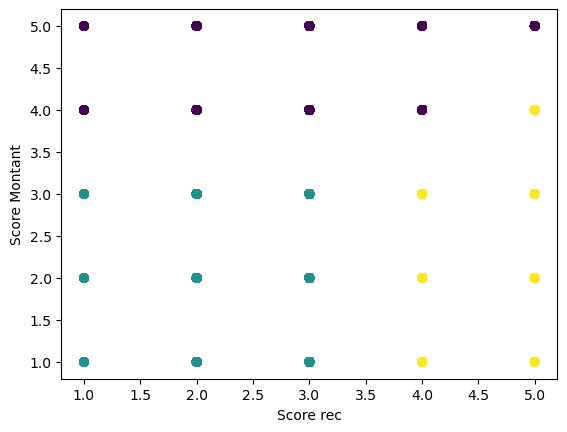

In [257]:
import matplotlib.pyplot as plt

# Fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[["score_rec", "score_montant"]])

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Plot the data points, coloring each one based on its cluster assignment
plt.scatter(data["score_rec"], data["score_montant"], c=cluster_assignments)
plt.xlabel("Score rec")
plt.ylabel("Score Montant")
plt.show()


In [258]:
data.columns

Index(['freight_value_x', 'review_score', 'score_freq', 'price_y', 'score_rec',
       'score_montant', 'customer_city', 'categorie_regroupee', 'cluster',
       'pca_1', 'pca_2'],
      dtype='object')

In [259]:
data

,freight_value_x,review_score,score_freq,price_y,score_rec,score_montant,customer_city,categorie_regroupee,cluster,pca_1,pca_2
0,12.00,5.0,1.0,129.90,4.0,4.0,cajamar,Mobilier,2,0.385100,-0.248208
1,8.29,4.0,1.0,18.90,4.0,1.0,osasco,Beauté et Santé,1,-1.728403,0.301763
2,17.22,3.0,1.0,69.00,1.0,2.0,sao jose,Livre et Papeterie,3,-0.294188,0.001904
3,17.63,4.0,1.0,25.99,2.0,1.0,belem,Technologie,1,-1.349681,-0.059739
4,16.89,5.0,1.0,180.00,2.0,5.0,sorocaba,Technologie,0,0.730167,0.406515
...,...,...,...,...,...,...,...,...,...,...,...
94716,248.71,5.0,1.0,1570.00,1.0,5.0,sanharo,Beauté et Santé,0,3.398562,-0.968226
94717,19.69,4.0,1.0,64.89,3.0,2.0,feira de santana,Alimentation,3,-0.314724,-0.053426
94718,22.56,5.0,1.0,89.90,1.0,3.0,sinop,Bricolage et Jardin,3,0.131418,-0.000623
94719,18.69,5.0,1.0,115.00,4.0,4.0,bom jesus do norte,Mode,3,0.380185,0.257095


In [260]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [261]:
categorical_columns

['customer_city', 'categorie_regroupee']

In [262]:
data.dtypes

freight_value_x        float64
review_score           float64
score_freq             float64
price_y                float64
score_rec              float64
score_montant          float64
customer_city           object
categorie_regroupee     object
cluster                  int32
pca_1                  float64
pca_2                  float64
dtype: object

In [263]:
data.columns

Index(['freight_value_x', 'review_score', 'score_freq', 'price_y', 'score_rec',
       'score_montant', 'customer_city', 'categorie_regroupee', 'cluster',
       'pca_1', 'pca_2'],
      dtype='object')

In [264]:
float_columns = data.select_dtypes(include=['float']).columns.tolist()
int32_columns = data.select_dtypes(include=['int32']).columns.tolist()
int64_columns = data.select_dtypes(include=['int64']).columns.tolist()

In [265]:
to_keep_columns = float_columns + int32_columns + int64_columns

In [266]:
to_keep_columns

['freight_value_x',
 'review_score',
 'score_freq',
 'price_y',
 'score_rec',
 'score_montant',
 'pca_1',
 'pca_2',
 'cluster']

In [267]:
data_elbow = data[to_keep_columns]

In [268]:
df = data_elbow
# changer en df

In [269]:
df = df.dropna()

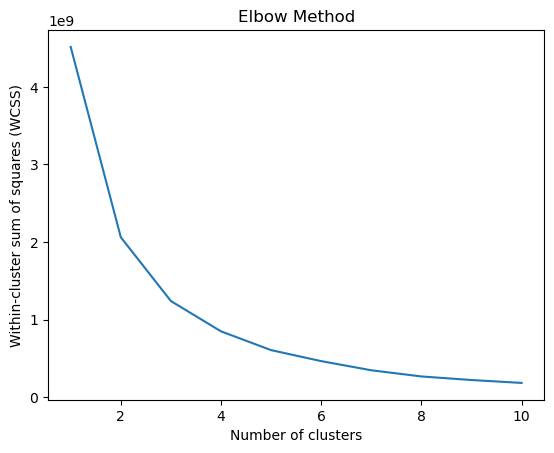

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Fit the KMeans model for a range of different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus number of clusters
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.show()


In [271]:
df.dtypes

freight_value_x    float64
review_score       float64
score_freq         float64
price_y            float64
score_rec          float64
score_montant      float64
pca_1              float64
pca_2              float64
cluster              int32
dtype: object

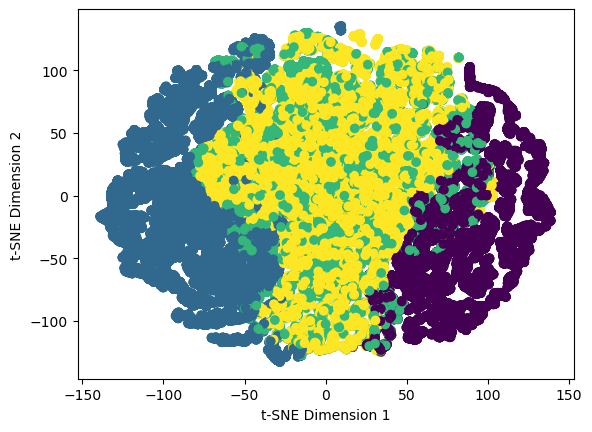

In [272]:
from sklearn.manifold import TSNE

# create the t-SNE object with the desired parameters
tsne = TSNE()

# fit and transform the data
reduced_data = tsne.fit_transform(df)

# plot the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["cluster"], cmap="viridis")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show() 
# T-SNE


c'est pire qu'avant largement 

In [273]:
dfa = pd.read_csv("data_analys.csv")

au moment du merge , enlever les doublons 